In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import random
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, GlobalAveragePooling2D
from keras.applications.resnet import ResNet50
from keras import initializers
from keras.optimizers import RMSprop
import time


Using TensorFlow backend.


### Print Dataset Directory

In [2]:
data_dir = os.listdir('../../../train_ds/')
for data in data_dir: 
    print(data)

cremad4896-5.wav
cremad5772-1.wav
tess1191-4.wav
cremad503-5.wav
cremad4190-3.wav
cremad864-2.wav
cremad205-0.wav
cremad2123-1.wav
cremad5581-4.wav
tess617-5.wav
cremad1081-2.wav
tess1319-1.wav
cremad4916-0.wav
tess1884-2.wav
tess994-3.wav
cremad6612-0.wav
tess118-0.wav
cremad7116-1.wav
cremad2178-0.wav
tess1164-4.wav
cremad6652-3.wav
cremad5045-3.wav
tess1221-1.wav
cremad4804-2.wav
tess2653-6.wav
cremad1223-1.wav
cremad4846-4.wav
tess625-5.wav
cremad3378-5.wav
cremad3639-5.wav
cremad6468-3.wav
cremad3940-1.wav
cremad1890-2.wav
cremad3626-4.wav
tess2677-6.wav
cremad4406-1.wav
tess502-0.wav
cremad6539-5.wav
cremad4591-1.wav
cremad6007-4.wav
tess1786-5.wav
cremad6846-5.wav
cremad2790-3.wav
tess2787-6.wav
cremad5995-1.wav
cremad2751-3.wav
cremad7193-2.wav
tess1406-2.wav
cremad1008-4.wav
cremad2195-2.wav
cremad1725-5.wav
tess404-0.wav
cremad6143-3.wav
cremad3105-4.wav
tess290-3.wav
tess2161-6.wav
tess631-5.wav
cremad5200-1.wav
cremad2009-3.wav
cremad1049-4.wav
cremad7103-5.wav
cremad463-5.

cremad1277-3.wav
cremad995-5.wav
cremad2967-0.wav
tess1332-1.wav
cremad6153-1.wav
tess402-0.wav
cremad5351-0.wav
cremad4520-5.wav
cremad827-2.wav
cremad1398-0.wav
cremad3681-5.wav
cremad113-3.wav
cremad1239-3.wav
cremad3570-1.wav
cremad3453-1.wav
cremad605-5.wav
cremad3585-0.wav
cremad4562-2.wav
cremad1795-4.wav
cremad5130-0.wav
tess135-0.wav
tess1812-2.wav
cremad189-1.wav
tess1922-2.wav
cremad6047-4.wav
cremad4131-4.wav
savee210-4.wav
cremad2684-1.wav
cremad1340-3.wav
cremad5389-0.wav
cremad912-3.wav
cremad6995-1.wav
cremad6896-5.wav
tess1178-4.wav
cremad4353-2.wav
tess2573-4.wav
cremad6787-5.wav
savee140-4.wav
tess2703-6.wav
tess2148-6.wav
cremad7045-1.wav
tess187-0.wav
tess440-0.wav
tess466-0.wav
tess1183-4.wav
cremad5964-5.wav
cremad6960-4.wav
tess2659-6.wav
cremad5103-1.wav
savee362-1.wav
cremad2724-0.wav
cremad1707-1.wav
tess176-0.wav
tess1911-2.wav
tess205-3.wav
cremad4365-3.wav
cremad2969-4.wav
tess2103-6.wav
cremad5731-5.wav
cremad6540-3.wav
tess6-0.wav
cremad1137-2.wav
cremad

tess454-0.wav
cremad3415-4.wav
cremad506-2.wav
cremad4841-5.wav
cremad2481-5.wav
cremad4062-0.wav
tess1486-2.wav
cremad5395-0.wav
tess509-0.wav
cremad7401-0.wav
cremad2422-5.wav
cremad6146-1.wav
tess268-3.wav
tess799-5.wav
cremad219-2.wav
tess2127-6.wav
tess1608-5.wav
cremad6859-4.wav
cremad4797-4.wav
cremad1626-5.wav
cremad3737-0.wav
cremad6238-4.wav
cremad4417-1.wav
cremad4256-2.wav
cremad3820-2.wav
cremad3596-0.wav
tess1372-1.wav
tess710-5.wav
tess1672-5.wav
savee402-1.wav
cremad4221-5.wav
tess1247-1.wav
tess241-3.wav
tess327-3.wav
cremad3356-3.wav
cremad2812-2.wav
tess779-5.wav
tess2520-4.wav
cremad1328-3.wav
tess133-0.wav
tess2662-6.wav
tess2327-1.wav
cremad1161-0.wav
cremad2091-0.wav
tess95-0.wav
tess1274-1.wav
cremad2665-4.wav
cremad6850-5.wav
cremad2263-2.wav
cremad4626-0.wav
cremad1227-0.wav
tess937-3.wav
cremad384-0.wav
cremad2512-3.wav
cremad3608-0.wav
tess1907-2.wav
tess2630-6.wav
cremad4090-2.wav
cremad1822-1.wav
cremad3156-3.wav
cremad130-5.wav
cremad6684-1.wav
cremad3910

### Import Dataset

In [3]:
data = pd.DataFrame(columns=['path', 'label'])

cnt = 0
for file in data_dir:
    nm = file.split('.')[0].split('-')
    path = '../../../train_ds/' + file
    label = int(nm[1])

    data.loc[cnt] = [path, label]
    cnt += 1

data.head()

,path,label
0,../../../train_ds/cremad4896-5.wav,5
1,../../../train_ds/cremad5772-1.wav,1
2,../../../train_ds/tess1191-4.wav,4
3,../../../train_ds/cremad503-5.wav,5
4,../../../train_ds/cremad4190-3.wav,3



### Testing imported Data


In [4]:
filename = data.path[0]
print (filename)

samples, sample_rate = librosa.load(filename)

../../../train_ds/cremad4896-5.wav


In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

### Plotting raw Wave Form and Spectrogram

Text(0.5, 0, 'Seconds')

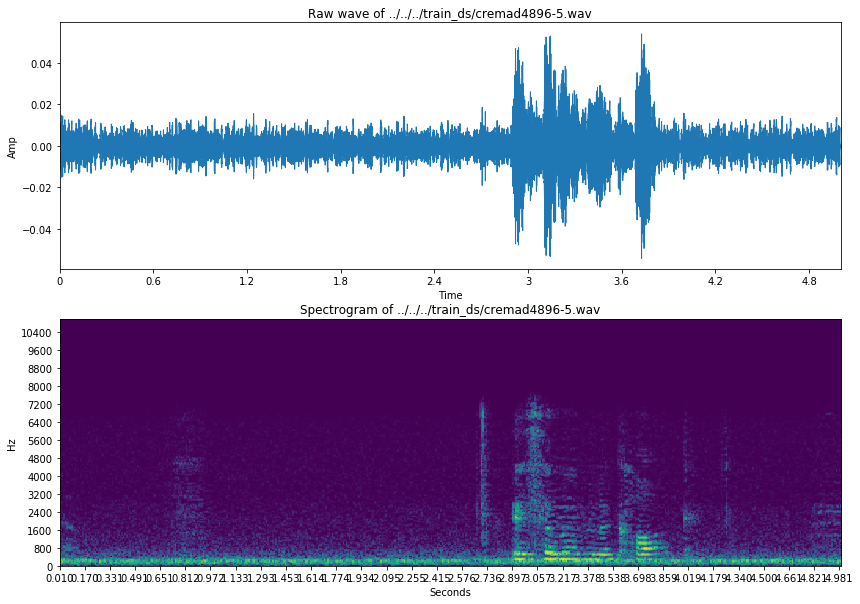

In [6]:
# Plotting Wave Form and Spectrogram

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amp')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Hz')
ax2.set_xlabel('Seconds')

### Cepstral Mean Normalization

In [7]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)

spectrogram = (spectrogram - mean) / std

### Plotting Mel Power Spectrogram

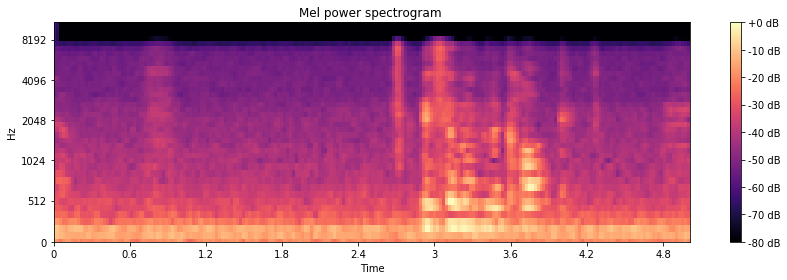

In [8]:
mps = librosa.feature.melspectrogram(samples,
                                     sr=sample_rate,
                                     n_mels=40)

# Convert to log scale
log_mps = librosa.power_to_db(mps, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_mps, sr=sample_rate,
                         x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### Plotting MFCC

(40, 216)


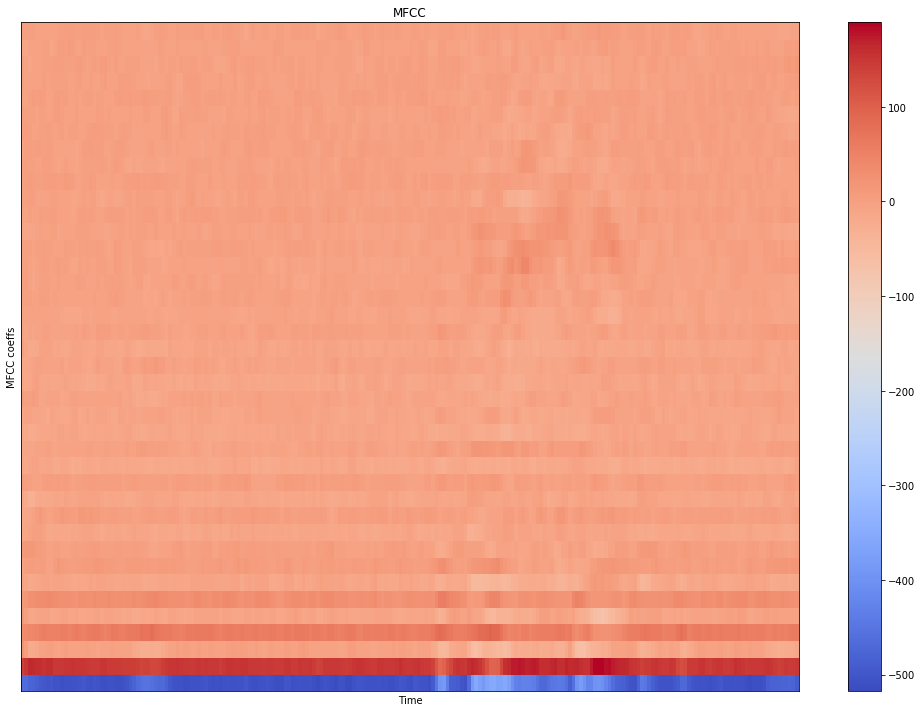

In [9]:
mfcc = librosa.feature.mfcc(y=samples, n_mfcc=40)

plt.figure(figsize=(14, 10))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
print(mfcc.shape)

In [10]:
data2 = data.copy()
data2.head()

,path,label
0,../../../train_ds/cremad4896-5.wav,5
1,../../../train_ds/cremad5772-1.wav,1
2,../../../train_ds/tess1191-4.wav,4
3,../../../train_ds/cremad503-5.wav,5
4,../../../train_ds/cremad4190-3.wav,3


### Convert dataset paths into mfccs

In [11]:
data = pd.DataFrame(columns=['feature', 'label'])

for i in tqdm(range(len(data2))):
    X, sample_rate = librosa.load(data2.path[i], duration=1, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    rest = np.zeros((40, 87 - mfcc.shape[1]))
    mfcc = np.hstack((mfcc, rest))
    mfccs = np.stack((mfcc,) * 3, axis = -1)
    data.loc[i] = [mfccs, data2.label[i]]

data.head()

100%|██████████| 10722/10722 [02:17<00:00, 77.75it/s]


,feature,label
0,"[[[-462.0721740722656, -462.0721740722656, -46...",5
1,"[[[-420.77398681640625, -420.77398681640625, -...",1
2,"[[[-721.6767578125, -721.6767578125, -721.6767...",4
3,"[[[-492.068115234375, -492.068115234375, -492....",5
4,"[[[-543.486572265625, -543.486572265625, -543....",3


### Split Test set before augmentation

In [12]:
X = data['feature'].values.tolist()
X = np.reshape(X, (len(data2), 40, 87, 3))
y = data.label
X_train_norm, X_test, y_train_norm, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

### Define Data Augmentation Methods

In [13]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.03*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 1
    pitch_change =  pitch_pm * 1.05 *(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=0.7,high=2.5)
    return (data * dyn_change)


### Save Augmented Data for testing

In [14]:
X, sample_rate = librosa.load(data2.path[0])
noise_sample = noise(X)
librosa.output.write_wav('noise_sample.wav', noise_sample, sample_rate)
shift_sample = shift(X)
librosa.output.write_wav('shift_sample.wav', shift_sample, sample_rate)
pitch_sample = pitch(X, sample_rate)
librosa.output.write_wav('pitch_sample.wav', pitch_sample, sample_rate)
dyn_change_sample = dyn_change(X)
librosa.output.write_wav('dyn_change_sample.wav', dyn_change_sample, sample_rate)

### Increase Train Set by using Data Augmentation

In [15]:
def rnd_aug(audio_wav):
    perc = np.random.rand()
    if perc < 0.25:
        audio_wav = noise(audio_wav)
    elif perc < 0.5:
        audio_wav = shift(audio_wav)
    elif perc < 0.75:
        audio_wav = pitch(audio_wav, 44100)
    elif perc < 1:
        audio_wav = dyn_change(audio_wav)
    return audio_wav

In [16]:
def batch_generator(audio_wav_paths, labels, batch_size, istraining):
    lb = LabelEncoder()
    while True:
        batch_mfcc = []
        batch_label = []
        for i in range(batch_size):
            if istraining:
                rnd_idx = random.randint(0, int(len(audio_wav_paths) * 0.6))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=1, res_type='kaiser_fast')
                label = data.label[rnd_idx]
                aug_audio_wav = rnd_aug(X)
            else:
                rnd_idx = random.randint(int(len(audio_wav_paths) * 0.6),
                                         int(len(audio_wav_paths) * 0.8))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=1, res_type='kaiser_fast')
                label = data.label[rnd_idx]
            mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
            rest = np.zeros((40, 87 - mfcc.shape[1]))
            mfcc = np.hstack((mfcc, rest))
            mfccs = np.stack((mfcc,) * 3, axis = -1)
            data.loc[i] = [mfccs, data2.label[i]]
            batch_mfcc.append(mfccs)
            batch_label.append(np_utils.to_categorical(label, 7))
        yield(np.asarray(batch_mfcc), np.asarray(batch_label))

### Set up Keras util functions

In [17]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

### Define Keras Model

In [18]:
model = keras.models.Sequential([
    keras.applications.MobileNet(include_top=False,
             weights = 'imagenet',
             input_tensor = None,
             input_shape = (40, 87, 3),
             pooling = None,
             classes = 7),
    GlobalAveragePooling2D(),
    Dense(7, activation='softmax')
])

/home/ee1/anaconda3/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

In [20]:
hist = model.fit_generator(batch_generator(data2.path, data2.label, 20, 1),
                           steps_per_epoch=30,
                           epochs=80,
                           validation_data=batch_generator(data2.path, data2.label, 20, 0),
                           validation_steps=20,
                           verbose=1,
                           shuffle=0)

Epoch 1/80
30/30 [==============================] - 23s 764ms/step - loss: 2.7391 - accuracy: 0.2967 - val_loss: 4.9484 - val_accuracy: 0.1600
Epoch 2/80
30/30 [==============================] - 19s 628ms/step - loss: 2.3113 - accuracy: 0.3867 - val_loss: 4.9697 - val_accuracy: 0.1925
Epoch 3/80
30/30 [==============================] - 19s 618ms/step - loss: 2.0110 - accuracy: 0.3917 - val_loss: 4.0266 - val_accuracy: 0.1800
Epoch 4/80
30/30 [==============================] - 19s 645ms/step - loss: 1.5841 - accuracy: 0.4500 - val_loss: 4.2228 - val_accuracy: 0.2600
Epoch 5/80
30/30 [==============================] - 20s 662ms/step - loss: 1.5782 - accuracy: 0.4567 - val_loss: 2.0593 - val_accuracy: 0.3550
Epoch 6/80
30/30 [==============================] - 19s 619ms/step - loss: 1.4188 - accuracy: 0.4633 - val_loss: 2.1826 - val_accuracy: 0.3775
Epoch 7/80
30/30 [==============================] - 19s 621ms/step - loss: 1.3250 - accuracy: 0.4850 - val_loss: 1.3195 - val_accuracy: 0.3875

Epoch 58/80
30/30 [==============================] - 18s 585ms/step - loss: 0.9289 - accuracy: 0.6417 - val_loss: 1.0896 - val_accuracy: 0.5075
Epoch 59/80
30/30 [==============================] - 18s 600ms/step - loss: 0.9460 - accuracy: 0.6400 - val_loss: 1.6274 - val_accuracy: 0.5475
Epoch 60/80
30/30 [==============================] - 17s 574ms/step - loss: 0.9709 - accuracy: 0.6417 - val_loss: 0.9267 - val_accuracy: 0.5250
Epoch 61/80
30/30 [==============================] - 19s 620ms/step - loss: 0.9401 - accuracy: 0.6433 - val_loss: 0.9961 - val_accuracy: 0.4775
Epoch 62/80
30/30 [==============================] - 18s 606ms/step - loss: 0.8630 - accuracy: 0.6767 - val_loss: 1.4862 - val_accuracy: 0.5200
Epoch 63/80
30/30 [==============================] - 19s 633ms/step - loss: 0.8883 - accuracy: 0.6550 - val_loss: 1.2128 - val_accuracy: 0.4925
Epoch 64/80
30/30 [==============================] - 20s 652ms/step - loss: 0.8960 - accuracy: 0.6883 - val_loss: 1.3491 - val_accuracy:

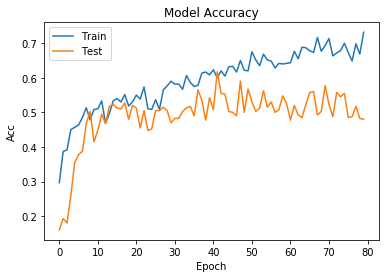

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
model.save('tl_xception_model14.h5')

### Test

In [23]:
results = model.evaluate(X_test, y_test)

2145/2145 [==============================] - 2s 891us/step


In [24]:
print('test loss, test acc:', results)

test loss, test acc: [1.7069026579051376, 0.4759906828403473]
